#Introducción
---
TFM: Aplicación de ciencia de datos en el sector de producción animal para la predicción y explicación de óptimos en ganado porcino.

*Titulo*: **Preparar Dataset Inicial**

*Autor*: **Jose Eduardo Cámara Gómez**

---


# Carga y limpieza de dataset

In [1]:
# Importación de paquetes
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
sns.set(style="darkgrid")


# Cargar Dataset Inicial

In [2]:
from google.colab import files
# Cargamos el fichero del dataset gmd.csv
uploaded = files.upload()

Saving gmd.csv to gmd.csv


In [3]:
# Leemos el fichero csv con los datos
df = pd.read_csv('gmd.csv', sep=';')

Comprobamos la cantidad de filas y columnas del dataset y los tipos iniciales que infiere en la carga.

In [4]:
print(df.shape)
print(df.dtypes)

(5332, 27)
ct_codigo           int64
ct_integra          int64
ct_granja           int64
ct_nave             int64
ct_tipo             int64
ct_raza             int64
ct_fase             int64
ct_sexo             int64
ct_ali_liquida     object
ct_tipo_ali         int64
IncPeso           float64
DiasMedios        float64
GMD               float64
EntradaInicial     object
EntradaFinal       object
NumAnimales         int64
na_nombre          object
na_rega            object
se_nombre          object
PesoEntMedio      float64
PesoRecMedio      float64
NumBajas          float64
GPS_Longitud      float64
GPS_Latitud       float64
gr_direccion       object
gr_codpos         float64
gr_poblacion       object
dtype: object


## Añadir Columna de Pienso Consumido

In [5]:
# Cargamos el fichero del dataset pienso_por_cto.csv
uploaded = files.upload()

Saving pienso_por_cto.csv to pienso_por_cto.csv


In [6]:
df_pienso = pd.read_csv('pienso_por_cto.csv', sep=';')

In [7]:
df_pienso.head()

,Contra,KgPienso
0,200191,136400
1,23803,1180850
2,3047,264020
3,200073,303050
4,2873,225440


In [8]:
df_pienso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Contra    5357 non-null   int64
 1   KgPienso  5357 non-null   int64
dtypes: int64(2)
memory usage: 83.8 KB


In [9]:
df_pienso.columns = ["ct_codigo","KgPiensoTotal"]

In [10]:
df_pienso["ct_codigo"] = pd.to_numeric(df["ct_codigo"], downcast='integer')

In [11]:
# Añadimos al Datafame el Pienso total
df = df.merge(df_pienso, on="ct_codigo", how="left")

## Quitar Atributos innecesarios

In [12]:
# Quitamos las columnas que no necesitamos
df.drop(columns=["ct_granja","ct_nave","ct_ali_liquida","ct_tipo_ali","gr_direccion"], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 0 to 5331
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ct_codigo       5332 non-null   int64  
 1   ct_integra      5332 non-null   int64  
 2   ct_tipo         5332 non-null   int64  
 3   ct_raza         5332 non-null   int64  
 4   ct_fase         5332 non-null   int64  
 5   ct_sexo         5332 non-null   int64  
 6   IncPeso         5332 non-null   float64
 7   DiasMedios      5332 non-null   float64
 8   GMD             5332 non-null   float64
 9   EntradaInicial  5332 non-null   object 
 10  EntradaFinal    5332 non-null   object 
 11  NumAnimales     5332 non-null   int64  
 12  na_nombre       5332 non-null   object 
 13  na_rega         5332 non-null   object 
 14  se_nombre       5332 non-null   object 
 15  PesoEntMedio    5332 non-null   float64
 16  PesoRecMedio    5332 non-null   float64
 17  NumBajas        5328 non-null   f

## Tratar Missing Values

<Axes: >

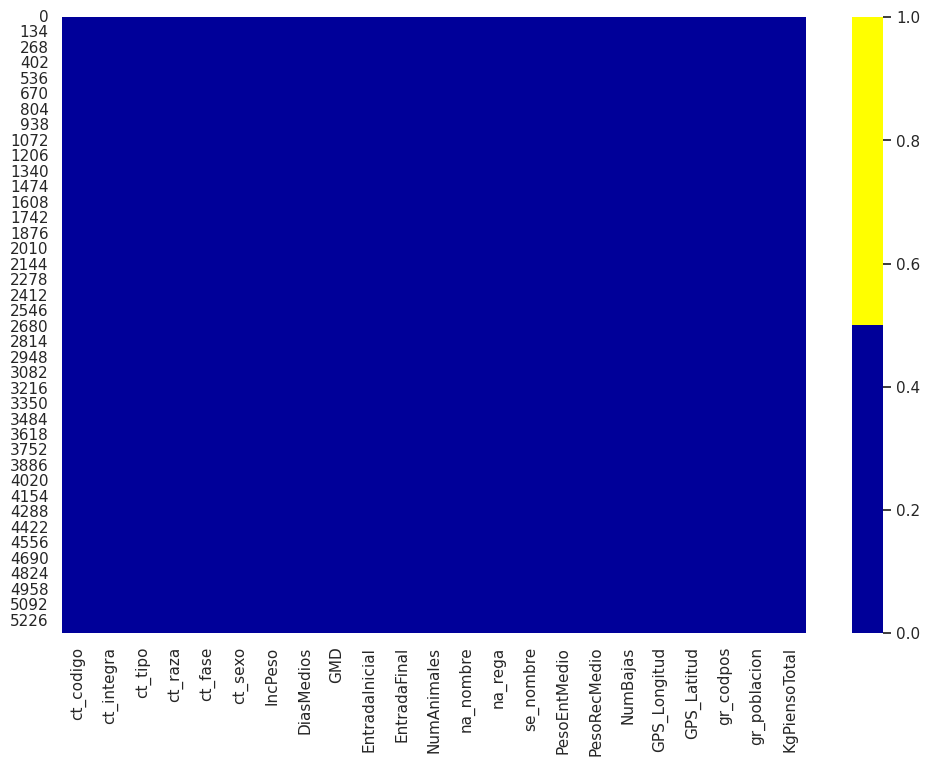

In [14]:
cols = df.columns[:] # Todas las columnas
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [15]:
# Mostramos las columnas con algún valor perdido
print('Columnas con valores perdidos:')
print('    Columna        \t Faltan\t Porcentaje')
print('    ---------------\t ------\t ----------')
for col in df.columns:
    num_missing = np.sum(df[col].isnull())
    pct_missing = np.mean(df[col].isnull())
    if num_missing>0:
        print('    {} \t {} \t {}%'.format(col.ljust(15), num_missing, round(pct_missing*100)))

Columnas con valores perdidos:
    Columna        	 Faltan	 Porcentaje
    ---------------	 ------	 ----------
    NumBajas        	 4 	 0%
    GPS_Longitud    	 5 	 0%
    GPS_Latitud     	 5 	 0%
    gr_codpos       	 3 	 0%


1) Para la columna **NumBajas**, que sólo tiene 4 filas en este estado y con pocos animales, es de suponer que no se ha producido ninguna baja en estos contratos. Por lo que podría ser razonable rellenarlos con 0.

In [16]:
print('Rellenamos con 0 bajas los faltantes')
df['NumBajas'] = df['NumBajas'].fillna(0)
df[df.NumBajas==0]

Rellenamos con 0 bajas los faltantes


,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
5,20316,1,2,69,20,8,29.724638,46.289855,0.642142,2021-04-06,...,ES300080840002,MACHO ENTERO + CATRADO+ HEMBRA,128.26087,157.985507,0.0,-1.39403,37.84721,30840.0,ALHAMA DE MURCIA,286920
2771,205463,398,2,69,2,8,18.250000,61.000000,0.299180,2021-09-15,...,ES300011440001,MACHO ENTERO + CATRADO+ HEMBRA,140.00000,158.250000,0.0,-1.01195,38.16640,30640.0,ABANILLA,458300
4146,200979,504,1,0,2,2,11.000000,16.000000,0.687500,2018-09-10,...,ES300261140006,MACHO ENTERO + HEMBRA,30.00000,41.000000,0.0,-1.29353,37.60660,30870.0,MAZARRON (MURCIA),398680
4147,201026,504,1,0,2,2,6.000000,9.000000,0.666667,2018-09-17,...,ES300261140006,MACHO ENTERO + HEMBRA,20.00000,26.000000,0.0,-1.29353,37.60660,30870.0,MAZARRON (MURCIA),727460


2) Para las columnas **GPS_Latitud** y **GPS_Longitud** (ambas forman parte de la misma característica localización GPS, separadas para poder apreciar más facilmente diferencias entre localizaciones por diferente latitud o longitud), en este caso veo que se refieren a contratos antiguos de granjas que probablemente han cambiado de integrador y las tenemos dadas de alta con otro código del que podremos recoger las coordenadas. Vamos a ver los datos a los que se refiere 

In [17]:
df[df.GPS_Longitud.isnull()]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
3957,3202,488,1,0,2,2,84.837291,103.733356,0.817840,2017-12-04,...,ES300261240028,MACHO ENTERO + HEMBRA,28.863920,113.701211,116.0,NaN,NaN,30850.0,TOTANA (MURCIA),532060
5277,204789,625,1,0,21,4,83.708418,108.700956,0.770080,2021-05-03,...,ES300241940002,MACHO ENTERO,24.688869,108.397287,64.0,NaN,NaN,30811.0,DIP. ORTILLO - LORCA,301240
5278,204122,625,1,0,22,5,94.881932,114.547425,0.828320,2020-12-04,...,ES300241940002,HEMBRA,22.535682,117.417614,51.0,NaN,NaN,30811.0,DIP. ORTILLO - LORCA,1841585
5279,204788,625,1,0,21,4,84.951442,109.050046,0.779013,2021-05-06,...,ES300241940002,MACHO ENTERO,23.702348,108.653790,76.0,NaN,NaN,30811.0,DIP. ORTILLO - LORCA,581780
5280,204121,625,1,0,21,4,97.528509,109.661638,0.889358,2020-12-04,...,ES300241940002,MACHO ENTERO,22.660912,120.189421,49.0,NaN,NaN,30811.0,DIP. ORTILLO - LORCA,386520


In [18]:
df[df.GPS_Longitud.isnull()].na_nombre.unique()

array(['PASO DEL PINO (OLD)', 'SALGADO (BAJA)'], dtype=object)

Si vemos los nombre de las naves (**na_nombre**) de las granjas que no tenemos los datos de localización GPS, obtenemos: "PASO DEL PINO (OLD)" y "SALGADO (BAJA)". Buscamos la localización de esta granja en otras filas del dataset, que se refieran a la misma granja para otro integrador y podemos rellenar estos valores por los valores reales. Las granjas a buscar son: "PASO DEL PINO" y "SALGADO".

In [19]:
granja_01 = 'PASO DEL PINO (OLD)'
latitud_01 = df[df.na_nombre=='PASO DEL PINO']['GPS_Latitud'].unique()
longitud_01 = df[df.na_nombre=='PASO DEL PINO']['GPS_Longitud'].unique()
print('Coordenadas Paso del Pino: Latitud=', latitud_01,', Longitud=', longitud_01)
df.loc[df.na_nombre==granja_01, 'GPS_Latitud'] = latitud_01
df.loc[df.na_nombre==granja_01, 'GPS_Longitud'] = longitud_01

granja_02 = 'SALGADO (BAJA)'
latitud_02 = df[df.na_nombre=='SALGADO']['GPS_Latitud'].unique()
longitud_02 = df[df.na_nombre=='SALGADO']['GPS_Longitud'].unique()
print('Coordenadas Salgado: Latitud=', latitud_02,', Longitud=', longitud_02)
df.loc[df.na_nombre==granja_02, 'GPS_Latitud'] = latitud_02[0]
df.loc[df.na_nombre==granja_02, 'GPS_Longitud'] = longitud_02[0]

print('Número de filas con nulos en GPS_Latitud', df.GPS_Latitud[df.GPS_Longitud.isnull()].sum())

Coordenadas Paso del Pino: Latitud= [37.69666] , Longitud= [-1.41345]
Coordenadas Salgado: Latitud= [37.7087] , Longitud= [-1.86494]
Número de filas con nulos en GPS_Latitud 0.0


Ya no tenemos nulos en los campos de localización GPS y hemos podido recuperar los valores correctos de los mismos.

3) Para la columna **gr_codpos** compruebo que sólo hay 3 filas, vemos los valores de los mismos.

In [20]:
df[df.gr_codpos.isnull()]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
5028,203585,585,1,84,2,2,96.288022,120.135838,0.801493,2020-07-31,...,ES040530000627,MACHO ENTERO + HEMBRA,17.038567,113.326590,34.0,-1.90652,37.4532,NaN,04600-HUERCAL OVERA (ALMERIA),188100
5095,203121,594,1,0,21,4,88.620976,107.285173,0.826032,2020-04-07,...,ES040530000075,MACHO ENTERO,25.600294,114.221270,55.0,-1.93933,37.4519,NaN,04600-HUERCAL OVERA (ALMERIA),221600
5096,203698,594,1,80,21,4,96.320930,107.721184,0.894169,2020-08-27,...,ES040530000075,MACHO ENTERO,20.633824,116.954753,73.0,-1.93933,37.4519,NaN,04600-HUERCAL OVERA (ALMERIA),813600


Como se puede ver en el campo gr_poblacion tienen metido el código postal, por lo que podemos sacarlo de aquí. En las 3 filas es 04600.

In [21]:
df['gr_codpos'] = df['gr_codpos'].fillna('04600')
# Comprobamos que ya hemos quitado todos los nulos de la columna de CP
df[df.gr_codpos.isnull()]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal


## Outliers (Datos fuera de rango)

En este paso intentaremos analizar las columnas que tienen valores fuera de rango, y que su no tratamiento pueda distorsionar los cálculos que queremos realizar en una fase posterior.

### Columna Objetivo (GMD)

El primer campo y más importante a analizar es el de la columna GMD, ya que es el objetivo a estimar, en esta columna los valores atípicos pueden influir de una manera muy decisiva y es muy importante detectarlos. Partimos de un histograma y un gráfico de caja para hacernos una idea de la distribución de los valores.


<Axes: >

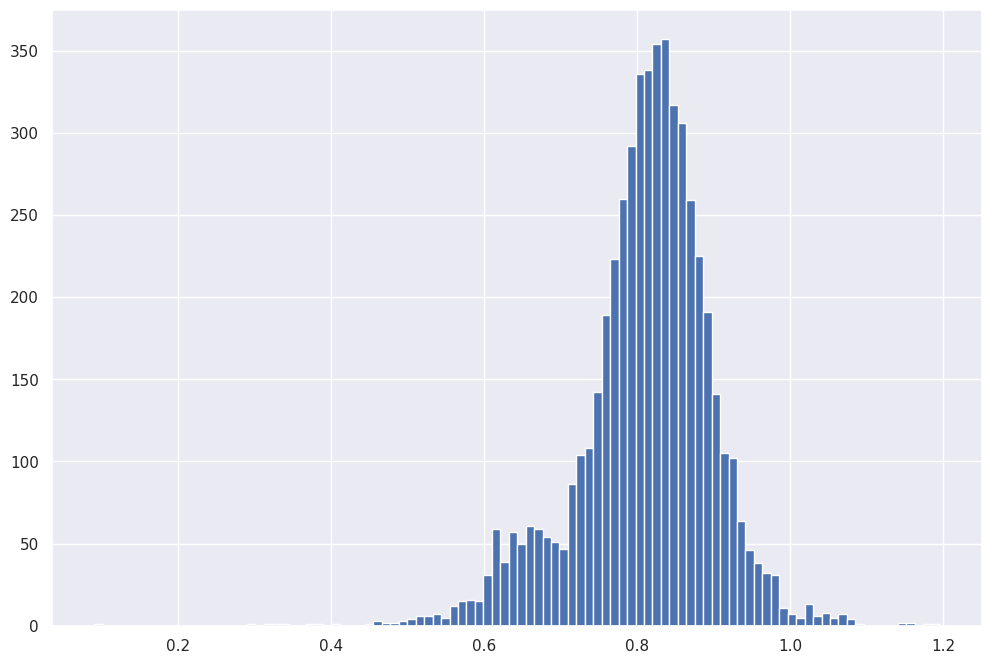

In [22]:
# histograma de GMD.
df['GMD'].hist(bins=100)

Text(1.0850000000000002, 0.85, '1.1')

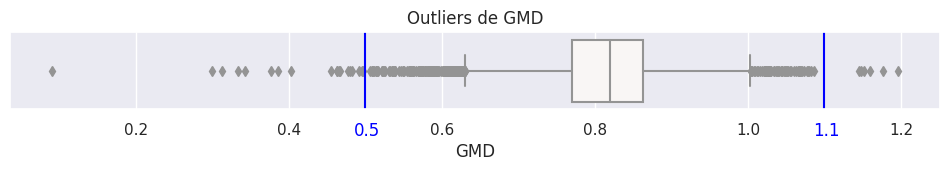

In [29]:
matplotlib.rcParams['figure.figsize'] = (12,1)
graph = sns.boxplot(data=df, x="GMD", palette="vlag")
graph.set(title='Outliers de GMD')
graph.axvline(0.5, color="blue")
graph.axvline(1.1, color="blue")
graph.text(x=0.5-0.015, y=0.85, s="0.5", color="blue")
graph.text(x=1.1-0.015, y=0.85, s="1.1", color="blue")

Como se aprecia en el histograma la distribución se parece mucho a 2 distribuciones normales, la mayoritaria y centrada en 0.85 aproximadamente (del cerdo blanco) y la de ibérico centrada en 0.7 aproximadamente. En los extremos se observan unos pocos valores muy atípicos que deberíamos quitar. Paso a mostrar el detalle de estas 2 colas de valores.

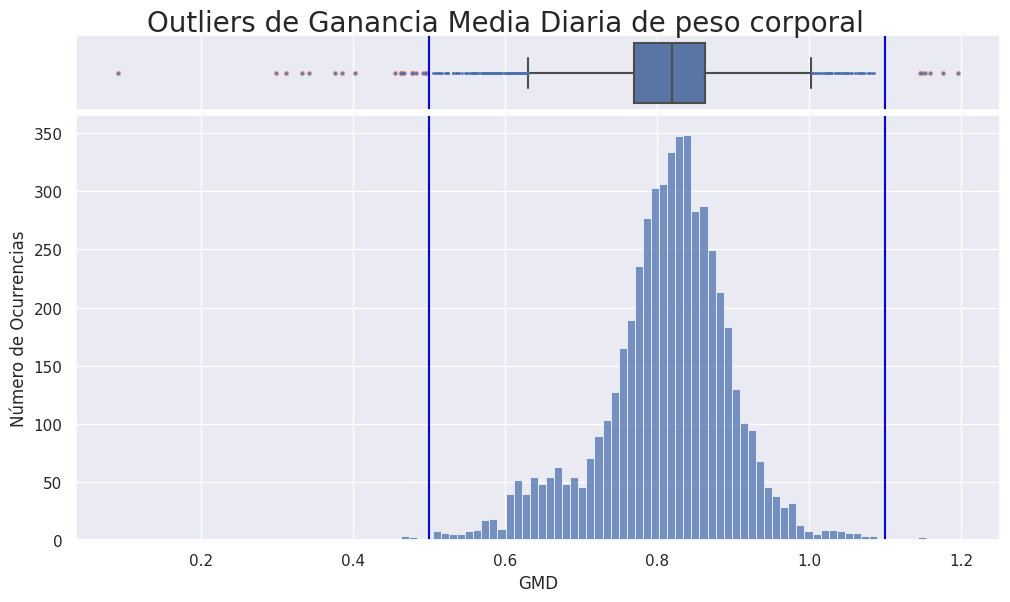

In [32]:
# Mostramos gráfico conjunto de cajas y bigotes e histograma para GMD, remarcando los valores a eliminar
matplotlib.rcParams['figure.figsize'] = (10,6)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
flierprops = dict(marker='o', markerfacecolor='r', markersize=1, linestyle='none', markeredgecolor='b')
sns.boxplot(x=df["GMD"], ax=ax_box, flierprops=flierprops)
sns.scatterplot(x=df.GMD[(df.GMD<0.5) | (df.GMD>1.1)], y=0, ax=ax_box, color='r', alpha=0.5, s=15)
sns.histplot(data=df, x="GMD", ax=ax_hist)
ax_box.axvline(0.5, color="blue")
ax_box.axvline(1.1, color="blue")
ax_hist.set(title="")
ax_hist.set(ylabel='Número de Ocurrencias')
ax_hist.axvline(0.5, color="blue")
ax_hist.axvline(1.1, color="blue")
ax_box.set(xlabel='')
f.suptitle('Outliers de Ganancia Media Diaria de peso corporal', fontsize=20)
f.tight_layout(pad=0.3)
plt.show()

In [33]:
df[df.GMD<=0.5]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
39,21158,1,1,7,2,2,79.924812,162.320802,0.492388,2019-08-09,...,ES020370000205,MACHO ENTERO + HEMBRA,30.000000,109.924812,31.0,-1.48801,38.42037,2499.0,"CANCARIX, HELLIN (ALBACETE)",410300
100,75104,1,2,69,2,8,65.086577,131.341684,0.495552,2017-12-05,...,ES180890000206,MACHO ENTERO + CATRADO+ HEMBRA,39.859739,104.946315,276.0,-2.94016,37.49124,18500.0,GUADIX (GRANADA),242520
129,59014,1,1,0,2,2,19.455093,58.274132,0.333855,2018-03-31,...,ES300302340012,MACHO ENTERO + HEMBRA,40.956072,60.411166,58.0,-1.17603,38.00758,30107.0,MURCIA,406180
160,14941,1,2,69,2,8,12.831223,26.587501,0.482604,2018-10-09,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,140.249220,153.080443,9.0,-1.52367,38.45461,2499.0,HELLIN,152060
181,15179,1,2,81,2,8,103.925923,216.645332,0.479705,2020-12-02,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,41.455078,145.381001,45.0,-1.52367,38.45461,2499.0,HELLIN,321040
191,16535,1,2,69,2,8,42.597701,85.784223,0.496568,2018-07-26,...,ES020370000233,MACHO ENTERO + CATRADO+ HEMBRA,33.658855,76.256556,219.0,-1.52367,38.45461,2499.0,HELLIN,172580
211,14942,1,2,69,2,8,12.610404,27.701812,0.455219,2019-03-29,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,142.085176,154.695580,44.0,-1.52367,38.45461,2499.0,HELLIN,245320
212,13545,1,2,69,2,8,38.733761,81.158613,0.477260,2017-09-01,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,108.032249,146.766011,52.0,-1.52367,38.45461,2499.0,HELLIN,394440
255,15378,1,2,81,2,8,109.862490,235.240870,0.467021,2020-09-16,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,36.068333,145.930823,58.0,-1.52367,38.45461,2499.0,HELLIN,339700
261,15779,1,2,81,2,8,100.088941,214.815845,0.465929,2020-06-18,...,ES020370000167,MACHO ENTERO + CATRADO+ HEMBRA,41.032900,141.121841,47.0,-1.52367,38.45461,2499.0,HELLIN,291240


In [34]:
df[df.GMD>=1.1]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
123,84821,1,1,0,2,2,153.663761,132.547357,1.159312,2019-10-14,...,ES180450000019,MACHO ENTERO + HEMBRA,47.205674,200.869435,152.0,-2.71646,37.75253,18818.0,CASTILLEJAR (GRANADA),213060
130,59012,1,1,0,2,2,44.806573,38.901605,1.151792,2017-10-24,...,ES300302340012,MACHO ENTERO + HEMBRA,46.672828,91.479401,21.0,-1.17603,38.00758,30107.0,MURCIA,410800
131,59015,1,1,0,2,2,83.461764,70.938251,1.176541,2018-10-01,...,ES300302340012,MACHO ENTERO + HEMBRA,18.900672,102.362436,103.0,-1.17603,38.00758,30107.0,MURCIA,71800
278,23805,1,2,81,2,8,57.355823,47.963306,1.195827,2020-05-25,...,ES451570000015,MACHO ENTERO + CATRADO+ HEMBRA,32.156863,89.512686,264.0,-4.26492,40.15770,45370.0,TOLEDO,175560
295,204130,1,2,69,20,8,35.751105,31.138230,1.148142,2021-01-22,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,25.000000,60.751105,25.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),64620
4159,200879,504,1,0,2,2,55.000000,48.000000,1.145833,2018-08-09,...,ES300261140006,MACHO ENTERO + HEMBRA,25.000000,80.000000,3.0,-1.29353,37.60660,30870.0,MAZARRON (MURCIA),535640


Veo correcto el número de líneas a eliminar quitando las que sean para valores de GMD menores o iguales a 0.5 o mayores o iguales a 1.1. El total de líneas que se eliminarán son 19+6 = 25 filas. Lo que es un número muy poco significativo en el tamaño de la muestra seleccionada inicialmente (que eran 5332 filas).

Procedo por tanto a eliminarlas.


In [35]:
# Eliminamos los outliers de GMD (25 filas)
df.drop(df[df.GMD <= 0.5].index, inplace=True)
df.drop(df[df.GMD >= 1.1].index, inplace=True)
# Mostramos las filas y columnas que aún nos quedan en el dataframe
df.shape

(5307, 23)

### Días de Engorde Medios

<Axes: >

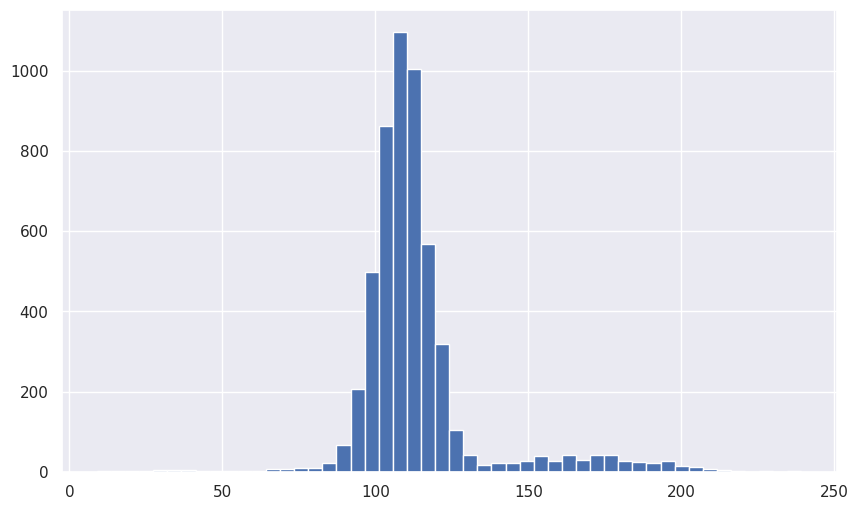

In [36]:
df.DiasMedios.hist(bins=50)

Creo que sería razonable mostrar como candidatos a eliminar los menores de 50 días o mayores de 210 días.

In [37]:
df[df.DiasMedios<=50]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
5,20316,1,2,69,20,8,29.724638,46.289855,0.642142,2021-04-06,...,ES300080840002,MACHO ENTERO + CATRADO+ HEMBRA,128.260870,157.985507,0.0,-1.39403,37.84721,30840.0,ALHAMA DE MURCIA,286920
125,59013,1,1,0,2,2,38.550571,39.731789,0.970270,2017-12-31,...,ES300302340012,MACHO ENTERO + HEMBRA,51.476669,90.027240,41.0,-1.17603,38.00758,30107.0,MURCIA,404440
282,205123,1,2,69,20,8,21.889020,34.725560,0.630343,2021-07-14,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,35.937500,57.826520,21.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),581800
283,203617,1,2,69,20,8,18.138455,31.527604,0.575320,2020-08-13,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,22.982917,41.121372,6.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),206000
284,204804,1,2,69,20,8,20.406071,38.132400,0.535137,2021-05-18,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,35.164030,55.570101,17.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),220540
285,204512,1,2,69,20,8,23.835784,22.328431,1.067508,2021-03-04,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,27.500000,51.335784,4.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),160540
286,205019,1,2,69,20,8,17.666089,34.646370,0.509897,2021-06-21,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,41.240000,58.906089,31.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),1006147
287,203966,1,2,69,20,8,18.420934,23.668147,0.778301,2020-10-27,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,24.148370,42.569304,24.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),233700
288,205752,1,2,69,20,8,26.797845,43.246810,0.619649,2021-11-17,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,45.441264,72.239108,26.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),302780
289,204066,1,2,69,20,8,15.864016,27.834669,0.569937,2020-11-19,...,ES300191340001,MACHO ENTERO + CATRADO+ HEMBRA,27.806196,43.670213,13.0,-1.46452,38.32480,30530.0,CIEZA (MURCIA),448020


In [38]:
df[df.DiasMedios>=210]

,ct_codigo,ct_integra,ct_tipo,ct_raza,ct_fase,ct_sexo,IncPeso,DiasMedios,GMD,EntradaInicial,...,na_rega,se_nombre,PesoEntMedio,PesoRecMedio,NumBajas,GPS_Longitud,GPS_Latitud,gr_codpos,gr_poblacion,KgPiensoTotal
762,200976,135,2,69,2,8,135.050994,227.661543,0.593210,2018-09-04,...,ES300210340046,MACHO ENTERO + CATRADO+ HEMBRA,33.266092,168.317086,106.0,-1.24652,37.75651,30320.0,30320-FUENTE ALAMO (MURCIA),529060
766,201073,135,2,69,2,8,140.514860,217.820675,0.645094,2018-10-11,...,ES300210340046,MACHO ENTERO + CATRADO+ HEMBRA,29.865320,170.380180,39.0,-1.24652,37.75651,30320.0,30320-FUENTE ALAMO (MURCIA),359820
1502,2873,256,2,69,2,8,122.743165,214.207547,0.573010,2017-09-07,...,ES300390740055,MACHO ENTERO + CATRADO+ HEMBRA,34.510204,157.253369,21.0,-1.46582,37.69884,30850.0,PARETON-TOTANA,324120
4204,201131,504,2,69,2,8,124.248636,215.894214,0.575507,2018-10-24,...,ES300210540165,MACHO ENTERO + CATRADO+ HEMBRA,36.121200,160.369836,425.0,-1.19509,37.80025,30319.0,FUENTE ALAMO (MURCIA),427120
4211,203649,504,2,69,2,8,123.370774,211.114173,0.584379,2020-08-18,...,ES300210640034,MACHO ENTERO + CATRADO+ HEMBRA,28.676471,152.047244,54.0,-1.18819,37.64211,30319.0,LAS PALAS (FUENTE ALAMO),216180
4219,201452,504,2,69,2,8,129.523709,213.700215,0.606100,2019-01-09,...,ES300210640034,MACHO ENTERO + CATRADO+ HEMBRA,35.267857,164.791566,66.0,-1.18819,37.64211,30319.0,LAS PALAS (FUENTE ALAMO),414780
4222,202417,504,2,69,2,8,122.681826,214.688492,0.571441,2019-10-04,...,ES300210640034,MACHO ENTERO + CATRADO+ HEMBRA,32.877698,155.559524,52.0,-1.18819,37.64211,30319.0,LAS PALAS (FUENTE ALAMO),74780
4224,201358,504,2,69,2,8,140.357554,239.282859,0.586576,2018-12-26,...,ES300210640034,MACHO ENTERO + CATRADO+ HEMBRA,27.994580,168.352134,82.0,-1.18819,37.64211,30319.0,LAS PALAS (FUENTE ALAMO),213560
4757,203399,548,2,69,2,8,123.987441,210.578947,0.588793,2020-06-25,...,ES300330140087,MACHO ENTERO + CATRADO+ HEMBRA,29.071038,153.058480,24.0,-1.72306,37.57477,30891.0,PUERTO LUMBRERAS,441900


Tras decidir procedente eliminar los valores señalados veo de mostrar un gráfico conjunto que resuma gráficamente los valores que vamos a eliminar.

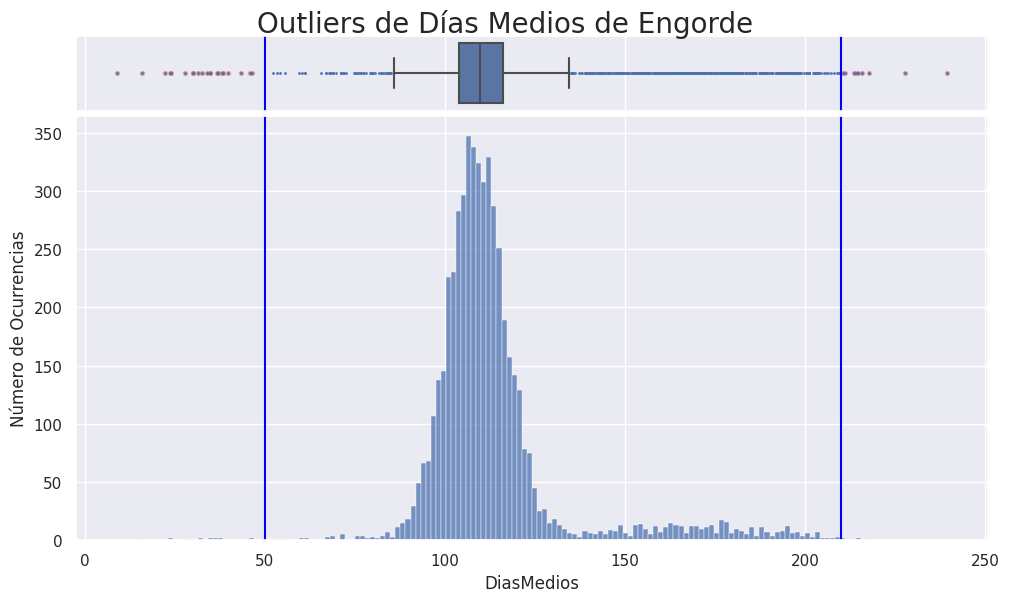

In [39]:
# DiasMedios
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
flierprops = dict(marker='o', markerfacecolor='r', markersize=1, linestyle='none', markeredgecolor='b')
sns.boxplot(x=df["DiasMedios"], ax=ax_box, flierprops=flierprops)
sns.scatterplot(x=df.DiasMedios[(df.DiasMedios<50) | (df.DiasMedios>210)], y=0, ax=ax_box, color='r', alpha=0.5, s=15)
sns.histplot(data=df, x="DiasMedios", ax=ax_hist)
ax_box.axvline(50, color="blue")
ax_box.axvline(210, color="blue")
ax_hist.set(title="")
ax_hist.set(ylabel='Número de Ocurrencias')
ax_hist.axvline(50, color="blue")
ax_hist.axvline(210, color="blue")
ax_box.set(xlabel='')
f.suptitle('Outliers de Días Medios de Engorde', fontsize=20)
f.tight_layout(pad=0.3)
plt.show()

In [40]:
# Eliminamos los outliers de DiasMedios (30 filas)
df.drop(df[df.DiasMedios <= 50].index, inplace=True)
df.drop(df[df.DiasMedios >= 210].index, inplace=True)
# Mostramos las filas y columnas que aún nos quedan en el dataframe
df.shape

(5277, 23)

Aún disponemos de 5.277 filas en nuestro dataset.

## Añadir Columnas Calculadas

Con el objetivo de estimar el cálculo del GMD puede ser conveniente crear nuevas columnas trasformadas de las que disponemos para facilitar que afloren patrones que creemos que pueden estar en la muestra y permitan una mejor estimación del resultado. Por ejemplo los relativos a estacionalidad.

## Detallar Fecha de Entrada

Como creemos que en el cálculo pueda tener influencia la estacionalidad, esta se puede mostrar más facilmente si disponemos del número de semana de la entrada al contrato. Además aprovecharemos para añadir el año por si este tiene influencia y las mejoras en las granjas y procesos se notan en la evolución del GMD.

In [41]:
# Corrijo el tipo de los campos de tipo Fecha.
df['EntradaInicial'] = pd.to_datetime(df.EntradaInicial, format='%Y-%m-%d')
df['EntradaFinal'] = pd.to_datetime(df.EntradaFinal, format='%Y-%m-%d')
# Añadimos la Semana de Entrada y el Año de Entrada
df['semanaEntrada'] = df.EntradaInicial.dt.isocalendar().week
df['añoEntrada'] = df.EntradaInicial.dt.isocalendar().year
df.columns

Index(['ct_codigo', 'ct_integra', 'ct_tipo', 'ct_raza', 'ct_fase', 'ct_sexo',
       'IncPeso', 'DiasMedios', 'GMD', 'EntradaInicial', 'EntradaFinal',
       'NumAnimales', 'na_nombre', 'na_rega', 'se_nombre', 'PesoEntMedio',
       'PesoRecMedio', 'NumBajas', 'GPS_Longitud', 'GPS_Latitud', 'gr_codpos',
       'gr_poblacion', 'KgPiensoTotal', 'semanaEntrada', 'añoEntrada'],
      dtype='object')

## Cuantificar Sexo

El campo Sexo en el dataset se representa por 2 campos un código ct_sexo y su descripción se_nombre. De este último se puede inferir que los animales pueden ser de los siguientes tipos: machos, hembras o machos castrados. Los castrados a nivel de crecimiento se comportan como las hembras, por lo que los podemos asemejar a estas. Los sexos de los contratos se componen de un porcentaje de animales de estos 3 tipos básicos de sexos. Por lo tanto sería más adecuado para el cálculo usar un porcentaje total de animales hembras/castrados, frente a machos. Podemos hacer un mapeo de estos valores en tanto por uno, con lo que añadiríamos la nueva columna del porcentaje de hembras (o castrados).

In [42]:
# Mostramos los valores que hay de los distintos sexos
df.value_counts(['ct_sexo','se_nombre'])

ct_sexo  se_nombre                     
2        MACHO ENTERO + HEMBRA             2495
4        MACHO ENTERO                      1156
5        HEMBRA                            1104
8        MACHO ENTERO + CATRADO+ HEMBRA     485
3        MACHO CASTRADO                      20
1        MACHO CASTRADO + HEMBRA             17
dtype: int64

In [43]:
# Añadimos el mapeo de los valores
sexos = { 1:1, 2:0.5, 3:1, 4:0, 5:1, 8:0.66 }
# Añadimos la columna de Porcentaje de Hembras
df['PorcHembras'] = df.ct_sexo.map(sexos)
# Comprobamos que la hemos creado correctamente
df.value_counts(['ct_sexo','se_nombre','PorcHembras'])

ct_sexo  se_nombre                       PorcHembras
2        MACHO ENTERO + HEMBRA           0.50           2495
4        MACHO ENTERO                    0.00           1156
5        HEMBRA                          1.00           1104
8        MACHO ENTERO + CATRADO+ HEMBRA  0.66            485
3        MACHO CASTRADO                  1.00             20
1        MACHO CASTRADO + HEMBRA         1.00             17
dtype: int64

Tras esto las 2 columnas anteriores podrían ser irrelevantes, y ser mucho más adecuada la nueva columna calculada. Por tanto podremos eliminar las anteriores del dataset.

In [44]:
# Eliminar las 2 columnas de sexo iniciales, las resume más pertinentemente la nueva columna de PorcHembras
df.drop(['ct_sexo', 'se_nombre'], inplace=True, axis=1)

## Pienso por cerda y día

Anteriormente se añadió la cantidad total en Kilos de pienso consumido por el contrato, pero para poder utilizarlo en la regresión es preferible pasarlo a una cantidad comparable directamente.

In [45]:
df["PiensoCerdaDia"] = df["KgPiensoTotal"] / (df["NumAnimales"] * df["DiasMedios"])

In [46]:
df.columns

Index(['ct_codigo', 'ct_integra', 'ct_tipo', 'ct_raza', 'ct_fase', 'IncPeso',
       'DiasMedios', 'GMD', 'EntradaInicial', 'EntradaFinal', 'NumAnimales',
       'na_nombre', 'na_rega', 'PesoEntMedio', 'PesoRecMedio', 'NumBajas',
       'GPS_Longitud', 'GPS_Latitud', 'gr_codpos', 'gr_poblacion',
       'KgPiensoTotal', 'semanaEntrada', 'añoEntrada', 'PorcHembras',
       'PiensoCerdaDia'],
      dtype='object')

# Datos Inconsistentes

## Nombre de la Granja

La columna **na_nombre** se corresponde con el nombre de la granja. Esta columna dice el nombre de la granja y viene definida por el integrador y nave concreta que se usa, por lo que si una misma granja a lo largo de los años tiene distintos integrados o está formada por distintas naves, puede darse el caso que tenga distintos nombres, porque o bien los antiguos se les añada un sufijo (OLD, baja, etc) o porque al escribirlos se cometa algún error tipográfico, por ejemplo es común que en ocasiones se le añada algún artículo y en otras no. 

Para nuestro problema puede ser interesante corregir todo esto para que las granjas se puedan definir de forma más unívoca y se pueda saber los distintos contratos que se refierene a la misma granja. Para ello lo primero que se me ocurre es poner todos los nombres en mayúsculas, y después quitar las stopwords como pueden ser "EL","LA","LOS","LAS","OLD","BAJA". También todo lo que venga entre paréntesis, que son añadidos, por ejemplo indicando si esa granja es de tal integrador.

Para implementar todas estas modificaciones voy a definir un pequeño método en python que simplifique los nombres de las naves, con lo comentado anteriormente.

In [47]:
import re
 
def simplificar_nombre(cadena):
    # Pasamos a mayúsculas
    cadena = " " + cadena.upper() + " "
    sustituir = {"Á":"A", "É":"E", "Í":"I", "Ó":"O", "Ú":"U", "-":" ",",":"","\.":"", " OLD ":"", " BAJA ":" ", " LA ":" ", " EL ":" ",
                 " LOS ":" ", " LAS ":" ", " IBERICO ":" ", " IB ":" ", " LECHONERA ":" "," LECHONERAS ":" ", "\xa0":""}
    # Quitamos lo que esté entre paréntesis
    cadena = re.sub('\(.*\)',' ', cadena)
    # Sustituimos los caracteres acentuados y las stopwords
    for cad1, cad2 in sustituir.items():
        cadena = re.sub(cad1, cad2, cadena)
    while '  ' in cadena:
        cadena = re.sub('  ',' ', cadena)
    return cadena.strip()

Veo de crear una nueva columna con el nombre de la granja simplificado

In [48]:
df['na_nombre2'] = df.na_nombre.map(simplificar_nombre)

Muestro el número total de nombres de granjas distintos que tengo antes y después de aplicar la corrección del nombre para ver si ha merecido la pena.

In [49]:
print('na_nombre', str(len(df.na_nombre.unique())), ' filas')
print('na_nombre2', str(len(df.na_nombre2.unique())), ' filas')

na_nombre 597  filas
na_nombre2 491  filas


Como se ve se ha conseguido eliminar 106 ocurrencias de nombres de granjas que en realidad eran la misma y tenían nombres con alguna diferencia.

Podemos borrar la columna antigua del nombre que ya no necesitaremos.

In [50]:
# Borramos la columna del nombre original de la granja, porque ya disponemos de la simplificada
df.drop(['na_nombre'], inplace=True, axis=1)

# Conclusiones

Tras todo el proceso de limpieza anterior nos encontramos con un dataset que dispone de 5.277 filas y 28 columnas. Partíamos de un dataset con 5.332 filas (hemos quitado 55 filas por distintos motivos) y que tenía 27 columnas, se han añadido varias columnas calculadas nuevas y se han eliminado otras que ya no eran necesarias, corrigiendo los datos por ejemplo de las columnas de tipo fecha.

El nuevo dataset está mucho más limpio, sin perder excesivas muestras en el proceso, ya no tiene missing values, y posee datos mejor preparados para poder usarlos en siguientes procesos de Machine Learning.

Se podría eliminar también la columna del código del contrato, que es un identificador que ya no aporta nada de cara a la estimación que queremos lograr en posteriores pasos, pero de momento lo dejo por si en futuras versiones algún dato se ve como fuera de rango poder saber que contrato lo provoca y poder consultar más detalle del mismo.

In [51]:
df.info

<bound method DataFrame.info of       ct_codigo  ct_integra  ct_tipo  ct_raza  ct_fase     IncPeso  \
0         20312           1        2       69        2  128.863349   
1         20315           1        2       69        2  112.100242   
2         20313           1        2       69        2  119.896276   
3         20311           1        2       69        2  115.469246   
4         20314           1        2       69        2  115.154338   
...         ...         ...      ...      ...      ...         ...   
5327     205865         645        1       93       22   89.653104   
5328     205864         645        1       93       21   93.623925   
5329     205825         646        1       84       21   91.368970   
5330     205625         647        1       84        2   90.636188   
5331     205947         649        1       84        2   88.114371   

      DiasMedios       GMD EntradaInicial EntradaFinal  ...  GPS_Longitud  \
0     197.617456  0.652085     2018-11-02   2018-1

In [52]:
# Grabamos los datos del Dataset modificado
df.to_csv("gmd_02.csv", sep=";")